In [1]:
#Importing the needed packages
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
# ML finds plots too big, thus the following customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook

In [47]:
#Define some parameters
k = 1.38 * 10**(-23)
T = 50

In [48]:
#define cumulative distribution function for
# p(E) = e^(-E/kT)/'Z1
#'Z1 is kT
def icdf(u):
    return -k*T*sp.log(1-u)

In [49]:
#Generates a number, n, of random energies based on above icdf
def rand_E(n):
    return icdf(sp.stats.uniform.rvs(size=n))

In [53]:
#generating 100 random energies
sample = rand_E(100)

<IPython.core.display.Javascript object>


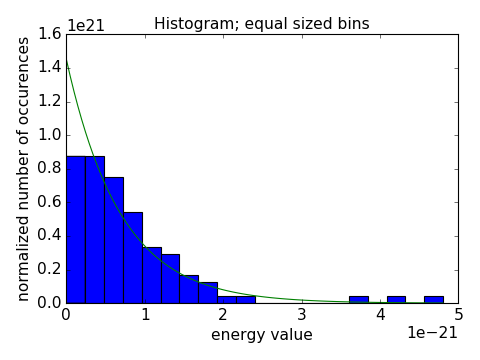

(array([  8.73941998e+20,   8.73941998e+20,   7.49093141e+20,
          5.41011713e+20,   3.32930285e+20,   2.91313999e+20,
          1.66465142e+20,   1.24848857e+20,   4.16162856e+19,
          4.16162856e+19,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.16162856e+19,   0.00000000e+00,   4.16162856e+19,
          0.00000000e+00,   4.16162856e+19]),
 array([  0.00000000e+00,   2.40290546e-22,   4.80581093e-22,
          7.20871639e-22,   9.61162185e-22,   1.20145273e-21,
          1.44174328e-21,   1.68203382e-21,   1.92232437e-21,
          2.16261492e-21,   2.40290546e-21,   2.64319601e-21,
          2.88348656e-21,   3.12377710e-21,   3.36406765e-21,
          3.60435819e-21,   3.84464874e-21,   4.08493929e-21,
          4.32522983e-21,   4.56552038e-21,   4.80581093e-21]))

In [54]:
#Creating a normalized histogram of the energy values
nbins = 20
low = 0
high = sp.amax(sample)
plt.figure()
plt.xlabel("energy value")
plt.ylabel("normalized number of occurences")
plt.title("Histogram; equal sized bins",fontsize=14)
out = plt.hist(sample,nbins,[low,high],normed=True)
out[0],out[1]    # occurrences and bin boundaries

In [56]:
#plotting probability function to see if random energy generator is working
def p(E):
    return (1/(k*T))*sp.exp(-E/(k*T))
E = sp.linspace(0,sp.amax(sample),100)
plt.plot(E,p(E))